UNRATE being a CSV of monthly unemployment rates from the US Bureau of Labor Statistics

https://www.bls.gov/cps/cps_htgm.htm

https://fred.stlouisfed.org/series/UNRATE

In [2]:
import pandas as pd
unrate = pd.read_csv('./UNRATE.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


Every time we call a pyplot function, the module maintains and updates the plot internally (also known as state). When we call show(), the plot is displayed and the internal state is destroyed. While this workflow isn't ideal when we're writing functions that create plots on a repeated basis as part of a larger application, it's useful when exploring data.

http://matplotlib.org/api/text_api.html#matplotlib.text.Text

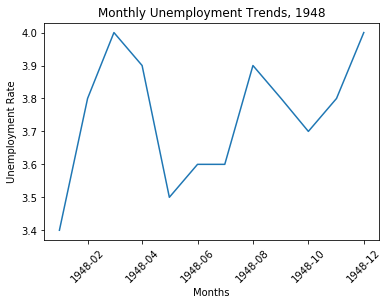

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(unrate['DATE'].head(12), unrate['UNRATE'].head(12))
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Unemployment Rate')
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

$$ (x_1 + 2)  /  (\alpha = \beta) $$

$$ x_1 = \theta_x^2  $$

- When a single plot was created, this happened in the background
    - a container for all plots was created (returned as a Figure object)
    - a container for the plot was positioned on a grid (the plot returned as an Axes object)
    - visual symbols were added to the plot (using the Axes methods)
    
A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

In [4]:
# We can manually create a figure by calling pyplot.figure():
plt.figure()

---
Instead of only calling the pyplot function, we assigned its return value to a variable (fig). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

values on the x-axis and y-axis
ticks on the x-axis and y-axis
all visual symbols, such as:
markers
lines
gridlines

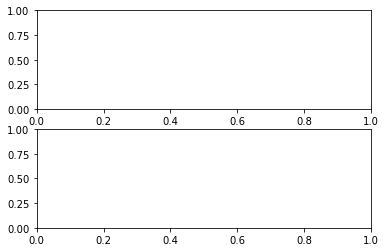

In [12]:
# While plots are represented using instances of the Axes class, 
    #they're also often referred to as subplots in matplotlib. 
#To add a new subplot to an existing figure, use Figure.add_subplot. 
# This will return a new Axes object, which needs to be assigned to a variable:
# axes_obj = fig.add_subplot(nrows, ncols, plot_number)
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
#This will create a grid, 2 rows by 1 column, of plots.
plt.show()

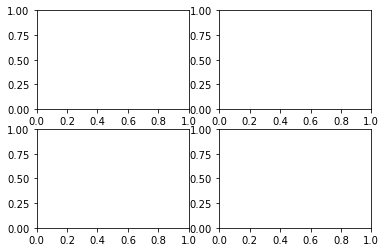

In [13]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(2,2,1)
ax2 = fig2.add_subplot(2,2,2)
ax3 = fig2.add_subplot(2,2,3)
ax4 = fig2.add_subplot(2,2,4)
# Any missing axes are just left blank
plt.show()

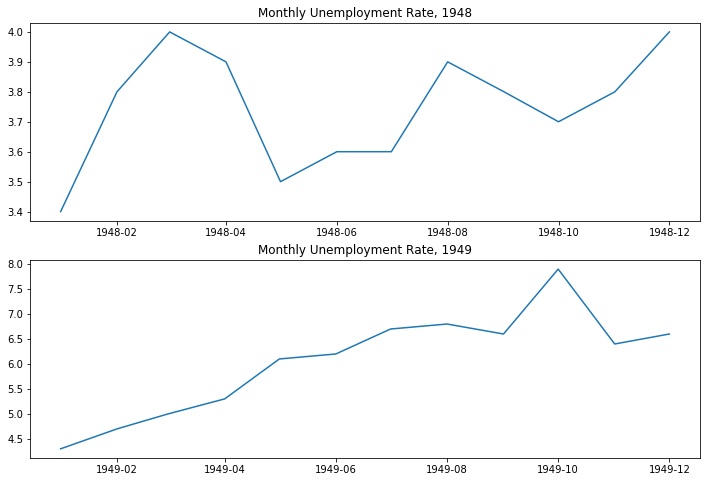

In [19]:
fig3 = plt.figure(figsize=(12,8))
ax1 = fig3.add_subplot(2,1,1)
ax1.plot(unrate['DATE'].head(12), unrate['UNRATE'].head(12))
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2 = fig3.add_subplot(2,1,2)
ax2.plot(unrate['DATE'].iloc[12:24], unrate['UNRATE'].iloc[12:24])
ax2.set_title('Monthly Unemployment Rate, 1949')

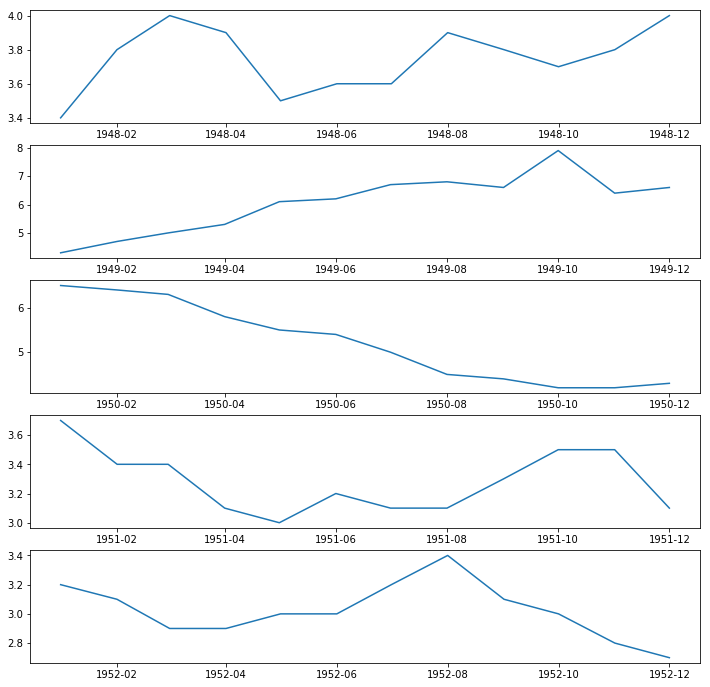

In [35]:
# display five years of data in five axes
fig4 = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig4.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['UNRATE'])

plt.show()

To extract the month values from the DATE column and assign them to a new column, we can use the pandas.Series.dt accessor:

In [26]:
# . Under the hood, pandas applies the datetime.date function over each datetime value in the DATE column, 
# which returns the integer month value
unrate['MONTH'] = unrate['DATE'].dt.month
unrate.head()

,DATE,UNRATE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5


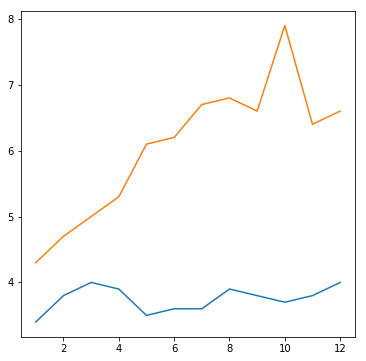

In [31]:
fig = plt.figure(figsize=(6,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['UNRATE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['UNRATE'])

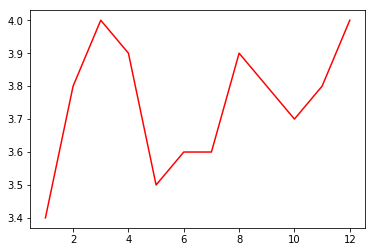

In [29]:
# http://matplotlib.org/api/colors_api.html
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['UNRATE'], c='red')

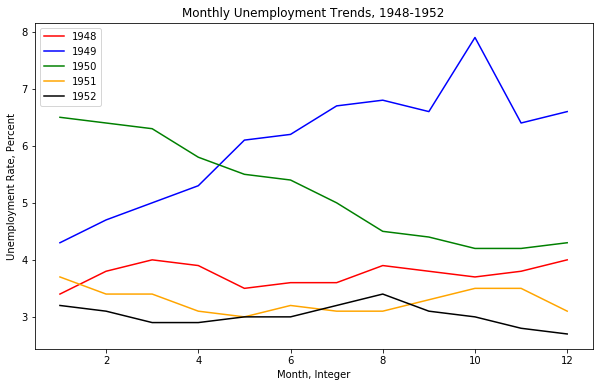

In [38]:
# fig = plt.figure(figsize=(10,6))
# plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
# plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
# plt.plot(unrate[24:36]['MONTH'], unrate[24:36]['VALUE'], c='green')
# plt.plot(unrate[36:48]['MONTH'], unrate[36:48]['VALUE'], c='orange')
# plt.plot(unrate[48:60]['MONTH'], unrate[48:60]['VALUE'], c='black')
# plt.show()

fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
labels =['1948', '1949', '1950', '1951', '1952']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['UNRATE'], c=colors[i], label=labels[i])
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.show()